# Covid-19 Prediction Using Machine Learning Linear Regression

## 4 Types of Covid-19 Vaccines
### BioNTech SE (BNTX), Johnson & Johnson (JNJ), Moderna, Inc. (MRNA), Pfizer Inc. (PFE)

In [1]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
title = "COVID-19 Vaccines"

symbols = ['BNTX', 'JNJ', 'MRNA', 'PFE']

start = '2020-01-01'
end = '2022-09-03'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


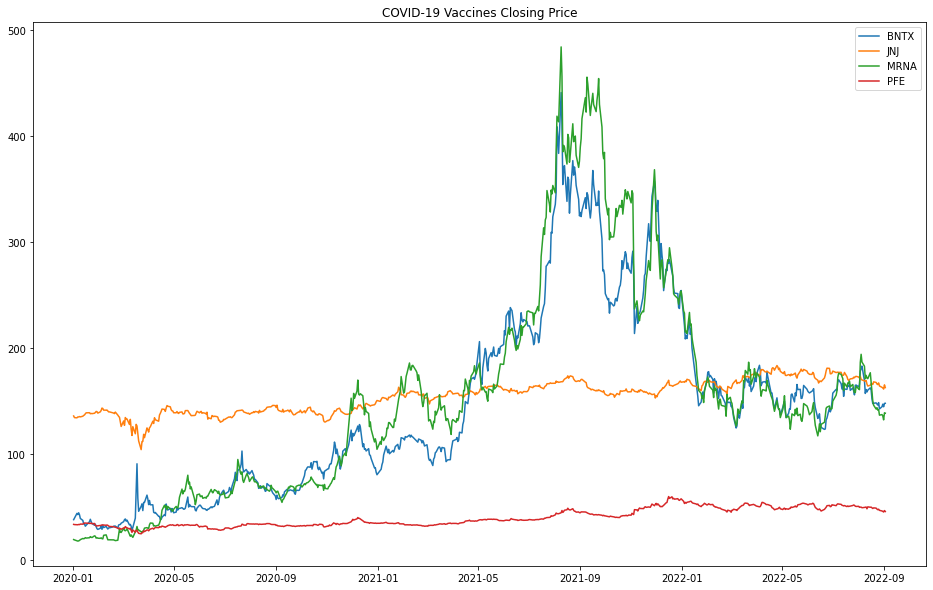

In [4]:
plt.figure(figsize=(16,10))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [5]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

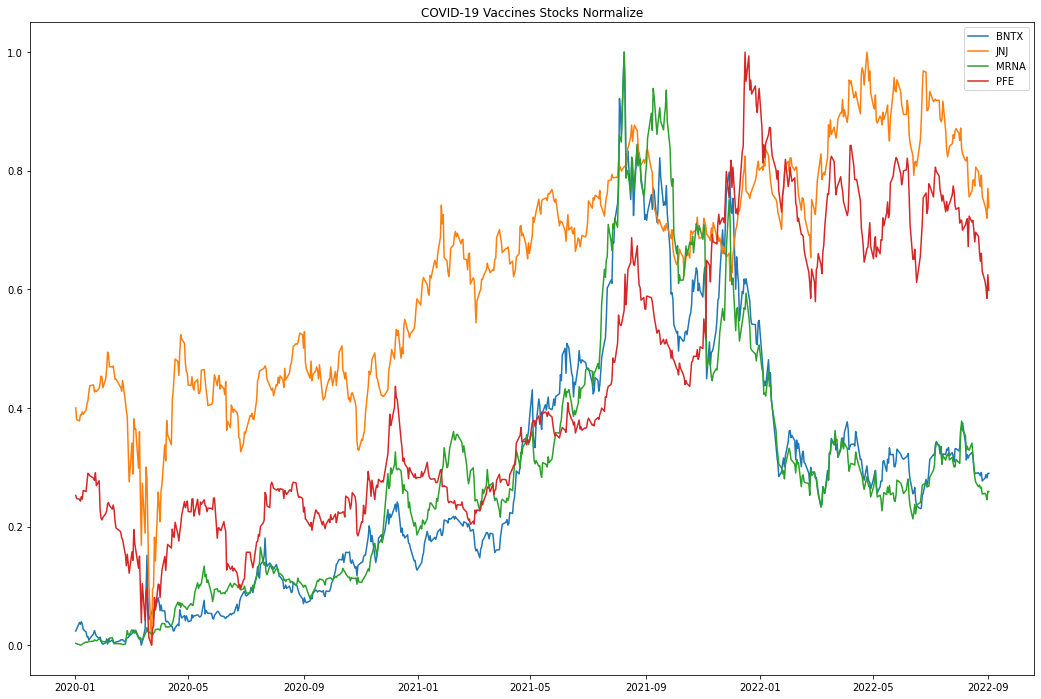

In [6]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

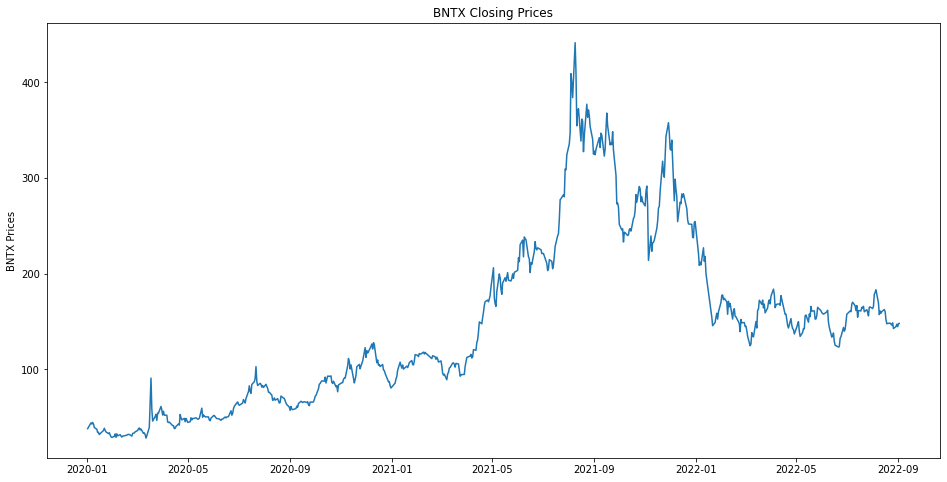

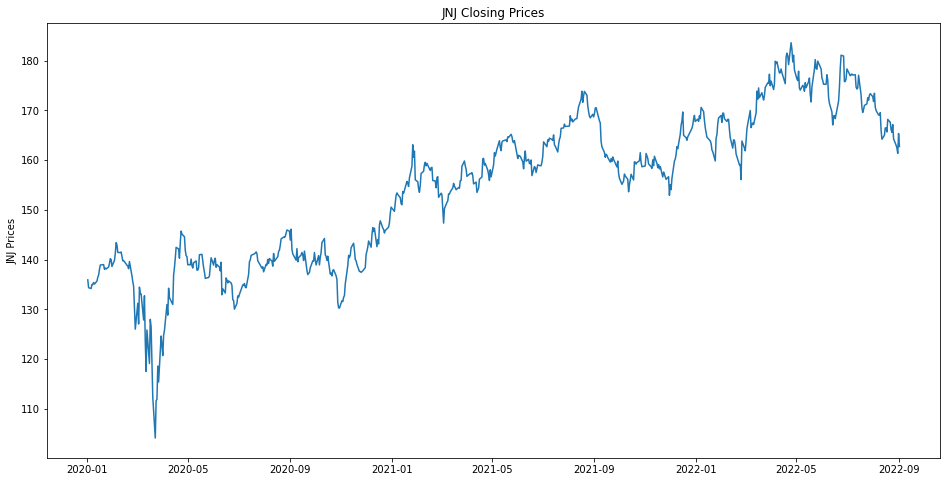

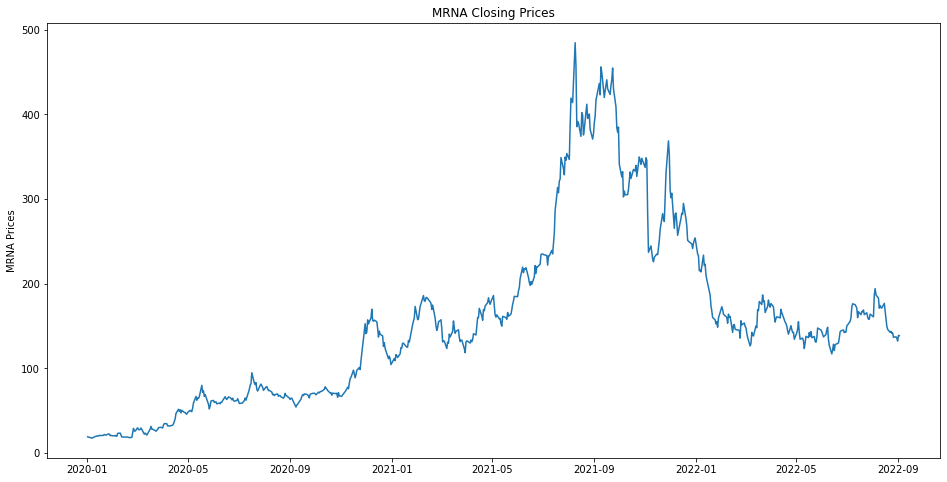

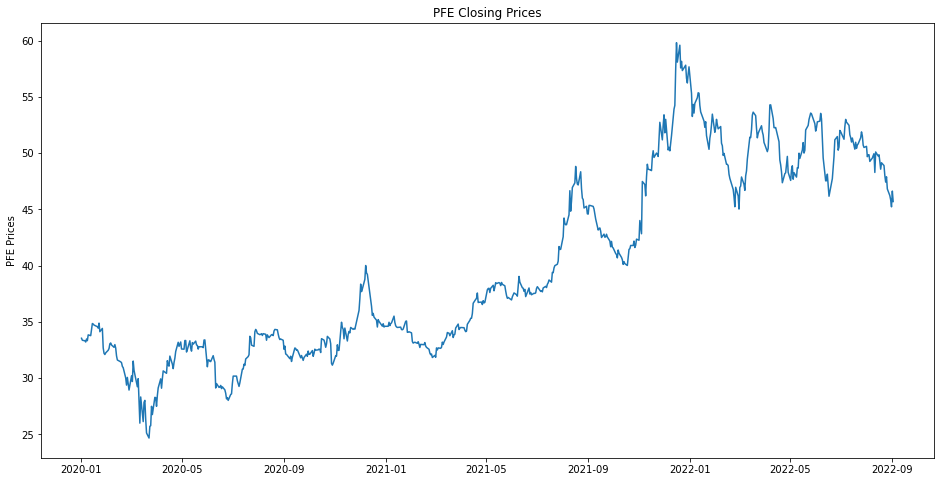

In [7]:
# Drop rows with missing values 
df= df.dropna() 

# Plot the closing price of PFE
for s in df:
    plt.figure(figsize=(16,8))
    plt.plot(df[s]) 
    plt.title(s + " Closing Prices")
    plt.ylabel(s + " Prices")
    plt.show()

In [8]:
# Define dependent variable
y = df
y.head()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2020-01-02,37.996727,135.936539,19.230000,33.538967
2020-01-03,39.526466,134.362717,18.889999,33.359020
2020-01-06,43.997250,134.195084,18.129999,33.316174
2020-01-07,42.773460,135.014587,17.780001,33.204777
2020-01-08,44.510452,134.995987,17.980000,33.470417


In [9]:
for s in df:
    df[s +'_S_3'] = df[s].shift(1).rolling(window=3).mean()
    df[s +'_S_9']= df[s].shift(1).rolling(window=9).mean()

In [10]:
df = df.dropna()
df.head()

,BNTX,JNJ,MRNA,PFE,BNTX_S_3,BNTX_S_9,JNJ_S_3,JNJ_S_9,MRNA_S_3,MRNA_S_9,PFE_S_3,PFE_S_9
Date,,,,,,,,,,,,
2020-01-15,34.098362,136.905029,20.240000,34.850021,36.858471,40.231572,135.740967,135.236026,19.800000,18.867778,33.981698,33.573244
2020-01-16,31.828428,138.013275,21.010000,34.798599,35.170823,39.798420,136.346288,135.343636,20.166667,18.980000,34.318746,33.718917
2020-01-17,32.746269,138.916565,20.620001,34.712914,33.335137,38.943082,137.122350,135.749254,20.416667,19.215555,34.661502,33.878870
2020-01-21,36.062351,139.009735,20.940001,34.567242,32.891020,37.692973,137.944956,136.273863,20.623334,19.492222,34.787178,34.034063
2020-01-22,38.371761,138.059830,21.969999,34.438717,33.545683,36.947295,138.646525,136.717768,20.856667,19.843333,34.692918,34.185448


# BioNTech SE (BNTX)

In [11]:
# Define dependent variable
By = df['BNTX']
By.head()

Date
2020-01-15    34.098362
2020-01-16    31.828428
2020-01-17    32.746269
2020-01-21    36.062351
2020-01-22    38.371761
Name: BNTX, dtype: float64

In [12]:
# Define independent variable
BX = df[['BNTX_S_3','BNTX_S_9']] 
BX.head()

,BNTX_S_3,BNTX_S_9
Date,,
2020-01-15,36.858471,40.231572
2020-01-16,35.170823,39.798420
2020-01-17,33.335137,38.943082
2020-01-21,32.891020,37.692973
2020-01-22,33.545683,36.947295


In [13]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(df)) 

# Train dataset 
BX_train = BX[:t] 
By_train = By[:t]  

# Test dataset 
BX_test = BX[t:] 
By_test = By[t:]


In [14]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Stock price = m1 * 3 days moving average + m2 * 15 days moving average + c
BNTX_linear = LinearRegression().fit(BX_train ,By_train) 
print("BNTX Price =", round(BNTX_linear.coef_[0],2), "* 3 Days Moving Average", round(BNTX_linear.coef_[1],2), "* 9 Days Moving Average +", round(BNTX_linear.intercept_,2))

BNTX Price = 1.29 * 3 Days Moving Average -0.3 * 9 Days Moving Average + 1.75


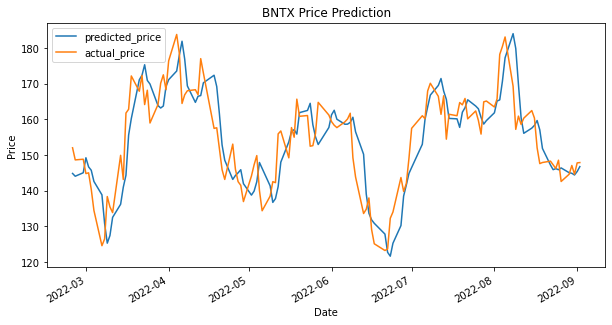

In [15]:
# Predicting the Stock prices
BNTX_pred = BNTX_linear.predict(BX_test) 
BNTX_pred = pd.DataFrame(BNTX_pred,index=By_test.index, columns = ['price'])  
BNTX_pred.plot(figsize=(10,5))  
By_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.title('BNTX Price Prediction')
plt.ylabel("Price")  
plt.show()

In [16]:
# Printout relevant metrics
print("Model Coefficients:", BNTX_linear.coef_)
print('Model y-intercept:', BNTX_linear.intercept_)
print("Mean Absolute Error:", mean_squared_error(By_test, BNTX_pred))
print("Coefficient of Determination:", r2_score(By_test, BNTX_pred))
print("Accuracy:", BNTX_linear.score(BX[t:],By[t:])*100)

Model Coefficients: [ 1.28758238 -0.29812113]
Model y-intercept: 1.7476135457349358
Mean Absolute Error: 55.16852893849226
Coefficient of Determination: 0.6857924032278245
Accuracy: 68.57924032278245


# Johnson & Johnson (JNJ)

In [17]:
# Define dependent variable
Jy = df['JNJ']
Jy.head()

Date
2020-01-15    136.905029
2020-01-16    138.013275
2020-01-17    138.916565
2020-01-21    139.009735
2020-01-22    138.059830
Name: JNJ, dtype: float64

In [18]:
# Define independent variable
JX = df[['JNJ_S_3','JNJ_S_9']] 
JX.head()

,JNJ_S_3,JNJ_S_9
Date,,
2020-01-15,135.740967,135.236026
2020-01-16,136.346288,135.343636
2020-01-17,137.122350,135.749254
2020-01-21,137.944956,136.273863
2020-01-22,138.646525,136.717768


In [19]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(df)) 

# Train dataset 
JX_train = JX[:t] 
Jy_train = Jy[:t]  

# Test dataset 
JX_test = JX[t:] 
Jy_test = Jy[t:]

In [20]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Stock price = m1 * 3 days moving average + m2 * 15 days moving average + c
JNJ_linear = LinearRegression().fit(JX_train ,Jy_train) 
print("JNJ Price =", round(JNJ_linear.coef_[0],2), "* 3 Days Moving Average", round(JNJ_linear.coef_[1],2), "* 9 Days Moving Average +", round(JNJ_linear.intercept_,2))

JNJ Price = 1.17 * 3 Days Moving Average -0.19 * 9 Days Moving Average + 2.57


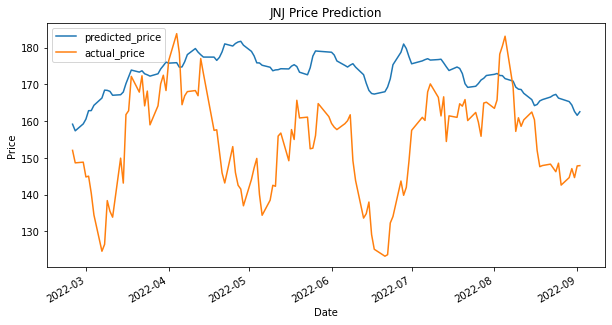

In [21]:
# Predicting the Stock prices
JNJ_pred = JNJ_linear.predict(JX_test) 
JNJ_pred = pd.DataFrame(JNJ_pred,index=Jy_test.index, columns = ['price'])  
JNJ_pred.plot(figsize=(10,5))  
By_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.title('JNJ Price Prediction')
plt.ylabel("Price")  
plt.show()

In [22]:
# Printout relevant metrics
print("Model Coefficients:", JNJ_linear.coef_)
print('Model y-intercept:', JNJ_linear.intercept_)
print("Mean Absolute Error:", mean_squared_error(Jy_test, JNJ_pred))
print("Coefficient of Determination:", r2_score(Jy_test, JNJ_pred))
print("Accuracy:", JNJ_linear.score(JX[t:],Jy[t:])*100)

Model Coefficients: [ 1.17120765 -0.18795314]
Model y-intercept: 2.5730564388117614
Mean Absolute Error: 5.903246197233038
Coefficient of Determination: 0.7917452038392943
Accuracy: 79.17452038392942


# Moderna, Inc. (MRNA)

In [23]:
# Define dependent variable
My = df['MRNA']
My.head()

Date
2020-01-15    20.240000
2020-01-16    21.010000
2020-01-17    20.620001
2020-01-21    20.940001
2020-01-22    21.969999
Name: MRNA, dtype: float64

In [24]:
# Define independent variable
MX = df[['MRNA_S_3','MRNA_S_9']] 
MX.head()

,MRNA_S_3,MRNA_S_9
Date,,
2020-01-15,19.800000,18.867778
2020-01-16,20.166667,18.980000
2020-01-17,20.416667,19.215555
2020-01-21,20.623334,19.492222
2020-01-22,20.856667,19.843333


In [25]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(df)) 

# Train dataset 
MX_train = MX[:t] 
My_train = My[:t]  

# Test dataset 
MX_test = MX[t:] 
My_test = My[t:]

In [26]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Stock price = m1 * 3 days moving average + m2 * 15 days moving average + c
MRNA_linear = LinearRegression().fit(MX_train ,My_train) 
print("MRNA Price =", round(MRNA_linear.coef_[0],2), "* 3 Days Moving Average", round(MRNA_linear.coef_[1],2), "* 9 Days Moving Average +", round(MRNA_linear.intercept_,2))

MRNA Price = 1.28 * 3 Days Moving Average -0.29 * 9 Days Moving Average + 1.83


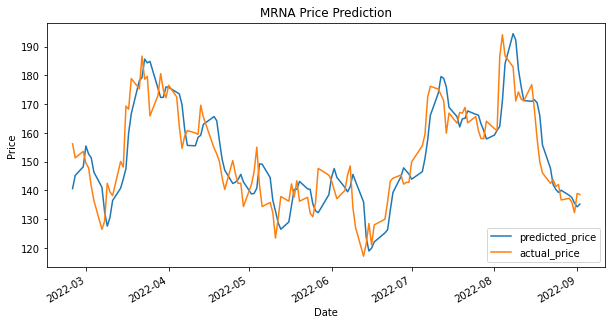

In [27]:
# Predicting the Stock prices
MRNA_pred = MRNA_linear.predict(MX_test) 
MRNA_pred = pd.DataFrame(MRNA_pred,index=My_test.index, columns = ['price'])  
MRNA_pred.plot(figsize=(10,5))  
My_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.title('MRNA Price Prediction')
plt.ylabel("Price")  
plt.show()

In [28]:
# Printout relevant metrics
print("Model Coefficients:", MRNA_linear.coef_)
print('Model y-intercept:', MRNA_linear.intercept_)
print("Mean Absolute Error:", mean_squared_error(My_test, MRNA_pred))
print("Coefficient of Determination:", r2_score(My_test, MRNA_pred))
print("Accuracy:", MRNA_linear.score(MX[t:],My[t:])*100)

Model Coefficients: [ 1.27544768 -0.28548458]
Model y-intercept: 1.8303712341701726
Mean Absolute Error: 73.97702074254212
Coefficient of Determination: 0.7367017068410885
Accuracy: 73.67017068410885


# Pfizer Inc. (PFE)

In [29]:
# Define dependent variable
Py = df['PFE']
Py.head()

Date
2020-01-15    34.850021
2020-01-16    34.798599
2020-01-17    34.712914
2020-01-21    34.567242
2020-01-22    34.438717
Name: PFE, dtype: float64

In [30]:
# Define independent variable
PX = df[['PFE_S_3','PFE_S_9']] 
PX.head()

,PFE_S_3,PFE_S_9
Date,,
2020-01-15,33.981698,33.573244
2020-01-16,34.318746,33.718917
2020-01-17,34.661502,33.878870
2020-01-21,34.787178,34.034063
2020-01-22,34.692918,34.185448


In [31]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(df)) 

# Train dataset 
PX_train = PX[:t] 
Py_train = Py[:t]  

# Test dataset 
PX_test = PX[t:] 
Py_test = Py[t:]

In [32]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Stock price = m1 * 3 days moving average + m2 * 15 days moving average + c
PFE_linear = LinearRegression().fit(PX_train ,Py_train) 
print("PFE Price =", round(PFE_linear.coef_[0],2), "* 3 Days Moving Average", round(PFE_linear.coef_[1],2), "* 9 Days Moving Average +", round(PFE_linear.intercept_,2))

PFE Price = 1.3 * 3 Days Moving Average -0.3 * 9 Days Moving Average + 0.3


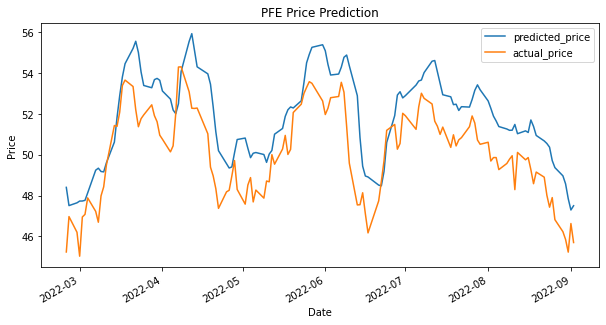

In [33]:
# Predicting the Stock prices
PFE_pred = JNJ_linear.predict(PX_test) 
PFE_pred = pd.DataFrame(PFE_pred,index=Py_test.index, columns = ['price'])  
PFE_pred.plot(figsize=(10,5))  
Py_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.title('PFE Price Prediction')
plt.ylabel("Price")  
plt.show()

In [34]:
# Printout relevant metrics
print("Model Coefficients:", PFE_linear.coef_)
print('Model y-intercept:', PFE_linear.intercept_)
print("Mean Absolute Error:", mean_squared_error(Py_test, PFE_pred))
print("Coefficient of Determination:", r2_score(Py_test, PFE_pred))
print("Accuracy:", PFE_linear.score(PX[t:],Py[t:])*100)

Model Coefficients: [ 1.29686528 -0.30439512]
Model y-intercept: 0.30331453002280995
Mean Absolute Error: 4.2667790948006195
Coefficient of Determination: 0.11343904138600525
Accuracy: 73.45569487893295


In [35]:
BNTX_score = BNTX_linear.score(BX[t:],By[t:])*100
JNJ_score = JNJ_linear.score(JX[t:],Jy[t:])*100
MRNA_score = MRNA_linear.score(MX[t:],My[t:])*100
PFE_score = PFE_linear.score(PX[t:],Py[t:])*100
BNTX_rscore = r2_score(By_test, BNTX_pred)
JNJ_rscore = r2_score(Jy_test, JNJ_pred)
MRNA_rscore = r2_score(My_test, MRNA_pred)
PFE_rscore = r2_score(Py_test, PFE_pred)


scores_df = pd.DataFrame({'Symbols':symbols,'Accuaracy Score':[BNTX_score,JNJ_score,MRNA_score,PFE_score],'R2':[BNTX_rscore,JNJ_rscore,MRNA_rscore,PFE_rscore] })
scores_df

,Symbols,Accuaracy Score,R2
0,BNTX,68.579240,0.685792
1,JNJ,79.174520,0.791745
2,MRNA,73.670171,0.736702
3,PFE,73.455695,0.113439
